# complex  number

(4+3j)


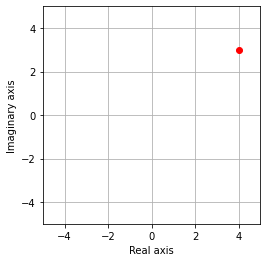

振幅 5.0
角度 0.6435011087932844


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.fftpack
import random
from mpl_toolkits.mplot3d import Axes3D
# import python library
z = complex(4,3) # this way
print(z)
plt.plot(np.real(z),np.imag(z),'ro')
plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()
mag = np.abs(z)
print( '振幅',mag )
phs = np.angle(z)
print( '角度',phs )

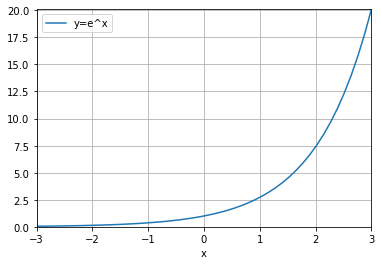

In [2]:
x = np.linspace(-3,3,num=50)
plt.plot(x,np.exp(x),label='y=e^x')
plt.axis([min(x),max(x),0,np.exp(x[-1])])
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.show()

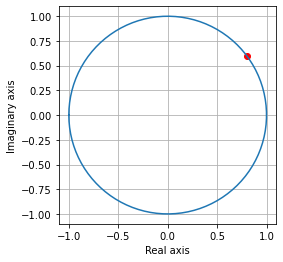

In [3]:
# e的ix次方
k = 2/np.pi
# Euler's notation
euler = np.exp(1j*k)
# plot dot
plt.plot(np.cos(k),np.sin(k),'ro')
# draw unit circle for reference
x = np.linspace(-np.pi,np.pi,num=100)
plt.plot(np.cos(x),np.sin(x))
# some plotting touch-ups
plt.axis('square')
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

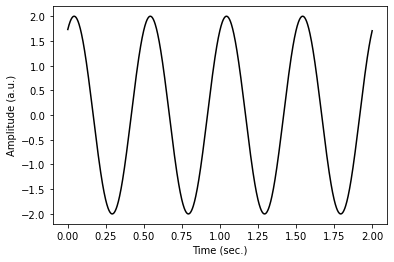

In [5]:
# simulation parameters
srate = 500; # sampling rate in Hz
time = np.arange(0.,2.,1./srate) # time in seconds
# sine wave param.eters
freq = 2; # frequency in Hz
ampl = 2; # amplitude in a.u.
phas = np.pi/3; # phase in radians
# generate the sine wave
sinewave = ampl * np.sin( 2*np.pi * freq * time + phas )
plt.plot(time,sinewave,'k')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

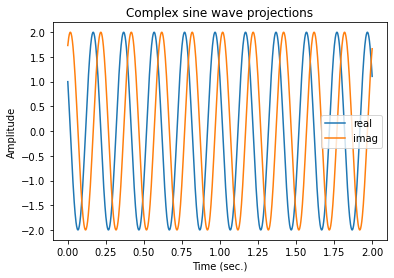

In [6]:
# general simulation parameters
srate = 500; # sampling rate in Hz
time = np.arange(0.,2.,1./srate) # time in seconds
# sine wave parameters
freq = 5; # frequency in Hz
ampl = 2; # amplitude in a.u.
phas = np.pi/3; # phase in radians
# generate the sine wave
csw = ampl * np.exp( 1j* (2*np.pi * freq * time + phas) );
# plot the results
plt.plot(time,np.real(csw),label='real')
plt.plot(time,np.imag(csw),label='imag')
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude')
plt.title('Complex sine wave projections')
plt.legend()
plt.show()
# e的（2πft+m）i次方 

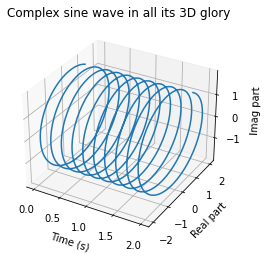

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(time,np.real(csw),np.imag(csw))
ax.set_xlabel('Time (s)'), ax.set_ylabel('Real part'), ax.set_zlabel('Imag part')
ax.set_title('Complex sine wave in all its 3D glory')
plt.show()
#如果我们用sin cos计算傅里叶变化的话，结果是取决于正弦波与信号之间相位的夹角的

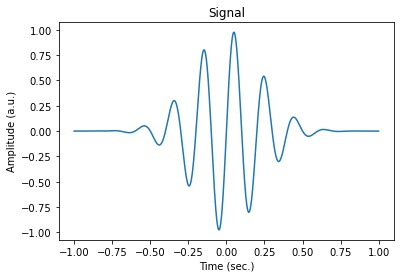

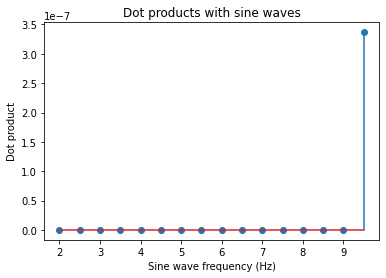

In [16]:
#复数点积是对信号的实数部分和虚数部分分别做点积
# phase of signal
theta = 0*np.pi/4;
# simulation parameters
srate = 1000;
time = np.arange(-1.,1.,1./srate)
# signal
sinew = np.sin(2*np.pi*5*time + theta)
gauss = np.exp( (-time**2) / .1);
signal = np.multiply(sinew,gauss)
# sine wave frequencies
sinefrex = np.arange(2.,10.,.5);
# plot signal
plt.plot(time,signal)
plt.xlabel('Time (sec.)'), plt.ylabel('Amplitude (a.u.)')
plt.title('Signal')
plt.show()
# initialize dot products vector
dps = np.zeros(len(sinefrex));
# loop over sine waves
for fi in range(1,len(dps)):
    sinew = np.exp( 1j*2*np.pi*sinefrex[fi]*time )
# compute dot product
dps[fi] = np.abs( np.dot( sinew,signal ) / len(time) )
# and plot
plt.stem(sinefrex,dps)
plt.xlabel('Sine wave frequency (Hz)'), plt.ylabel('Dot product')
plt.title('Dot products with sine waves')
plt.show()
#复数正弦波有两个波，实数和虚数，当相位发生变化时，他的点永远是复平面上的一个点
#相位表示这个向量与实数轴的一个夹角，但是他永远会在这个复平面上，现在我们算的是这个点到原点的距离，他的幅值是不会发生变化的

AttributeError: 'function' object has no attribute 'display'

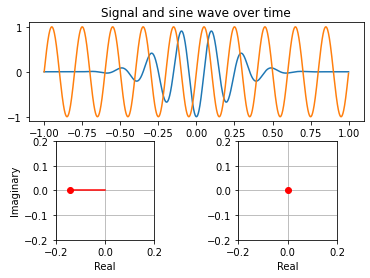

In [20]:
# create complex sine wave
csw = np.exp( 1j*2*np.pi*5*time )
rsw = np.sin( 2*np.pi*5*time )
# specify range of phase offsets for signal
phases = np.linspace(0,7*np.pi/2,num=100)
for phi in range(0,len(phases)):
# create signal
  sinew = np.sin(2*np.pi*5*time + phases[phi])
gauss = np.exp( (-time**2) / .1)
signal = np.multiply(sinew,gauss)
# compute complex dot product
cdp = np.sum( np.multiply(signal,csw) ) / len(time)
# compute real-valued dot product
rdp = sum( np.multiply(signal,rsw) ) / len(time)
# plot signal and real part of sine wave
plt.cla() # wipe the figure
plt.subplot2grid((2,2), (0, 0), colspan=2)
plt.plot(time,signal)
plt.plot(time,rsw)
plt.title('Signal and sine wave over time')
# plot complex dot product
plt.subplot2grid((2,2), (1, 0))
plt.plot(np.real(cdp),np.imag(cdp),'ro')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axis('square')
plt.grid(True)
plt.axis([-.2,.2,-.2,.2])
plt.plot([0,np.real(cdp)],[0,np.imag(cdp)],'r')
# draw normal dot product
plt.subplot2grid((2,2), (1, 1))
plt.plot(rdp,0,'ro')
plt.xlabel('Real')
plt.axis('square')
plt.grid(True)
plt.axis([-.2,.2,-.2,.2])
# show plot 

display.display(pl.gcf())
ttime.sleep(.01)

# Convolution

Dot Product: 556
Dot Product: 749.6634442624979


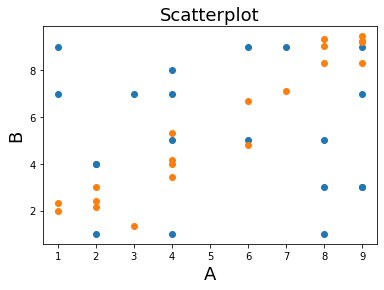

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

a = np.random.randint(1,10,20)
b = np.random.randint(1,10,20)

#the two vectors need to be of the same length. 20个对应的向量点

plt.scatter(a,b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)
plt.title('Scatterplot', fontsize=18)

print('Dot Product: %s' % np.dot(a,b))
 
#add gaussian noise on top of one of the vectors

b = a + np.random.randn(20)
plt.scatter(a,b)
plt.ylabel('B', fontsize=18)
plt.xlabel('A', fontsize=18)
plt.title('Scatterplot', fontsize=18)

print(f'Dot Product: {np.dot(a,b)}')

Text(0.5, 1.0, 'Kernel ')

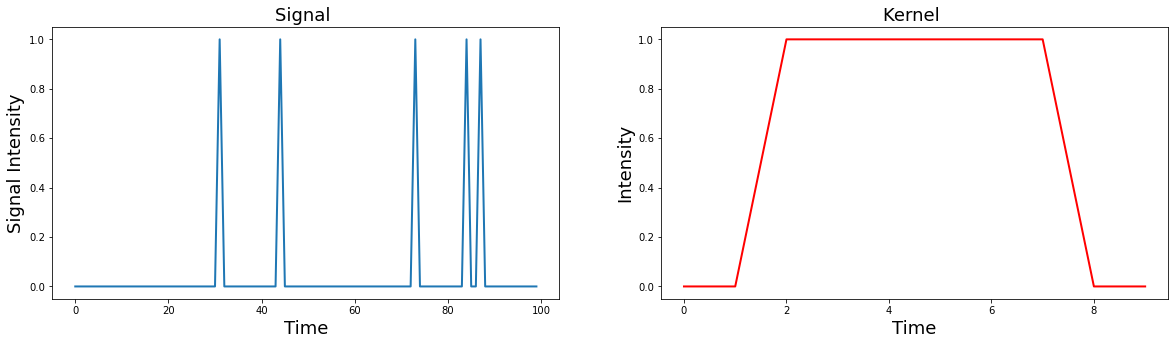

In [3]:
n_samples = 100

signal = np.zeros(n_samples)
signal[np.random.randint(0 ,n_samples, 5)] = 1
# one signal weights each time point of the other signal and then slides forward over time.
#  call the timeseries variable signal and the other vector the kernel.
# kernel will almost always be smaller than the signal

kernel = np.zeros(10)
kernel[2:8] = 1
#周围的包括自己的十个数据进行卷积，自己为中间位置。第一个signal对应卷积的是kernel卷积中间值，所以在原始signal前加kerne/2个0点，最后一个signal后也加kerne/2个0点

f,a = plt.subplots(ncols=2, figsize=(20,5))
a[0].plot(signal, linewidth=2)
a[0].set_xlabel('Time', fontsize=18)
a[0].set_ylabel('Signal Intensity', fontsize=18)
a[0].set_title('Signal ', fontsize=18)
a[1].plot(kernel, linewidth=2, color='red')
a[1].set_xlabel('Time', fontsize=18)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_title('Kernel ', fontsize=18)

Text(0.5, 1.0, 'Time Shifted Kernels')

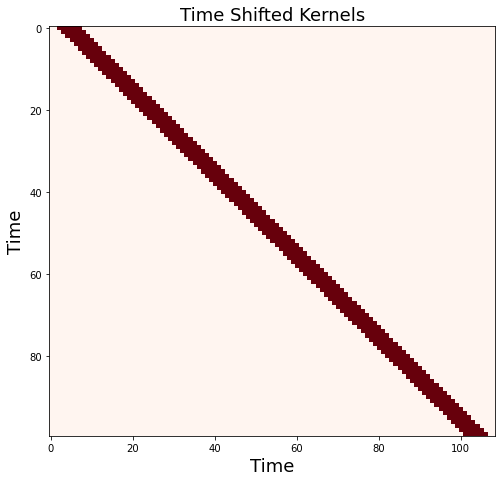

In [4]:
shifted_kernel = np.zeros((n_samples, n_samples+len(kernel) - 1))
for i in range(n_samples):
    shifted_kernel[i, i:i+len(kernel)] = kernel

plt.figure(figsize=(8, 8))
plt.imshow(shifted_kernel, cmap='Reds')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Time', fontsize=18)
plt.title('Time Shifted Kernels', fontsize=18)

Text(0.5, 1.0, 'Signal convolved with boxcar kernel')

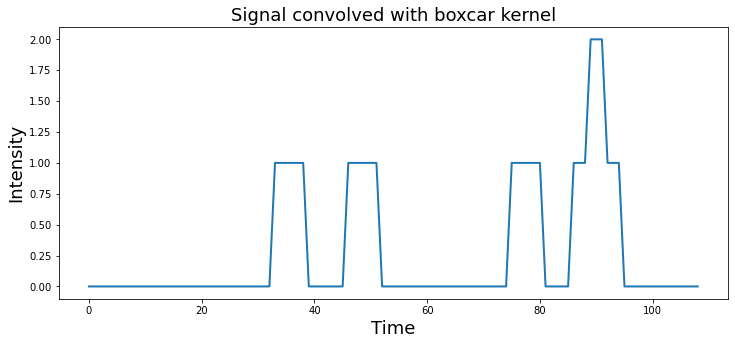

In [5]:
convolved_signal = np.dot(signal, shifted_kernel)

# this is simply moving the boxcar kernel, which is 6 seconds in duration forward in time for each sample

plt.figure(figsize=(12, 5))
plt.plot(convolved_signal, linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Signal convolved with boxcar kernel', fontsize=18)

In [6]:
print(f"Signal Length: {len(signal)}")
print(f"Kernel Length: {len(kernel)}")
print(f"Convolved Signal Length: {len(convolved_signal)}")

Signal Length: 100
Kernel Length: 10
Convolved Signal Length: 109


Text(0.5, 1.0, 'Signal convolved with boxcar kernel')

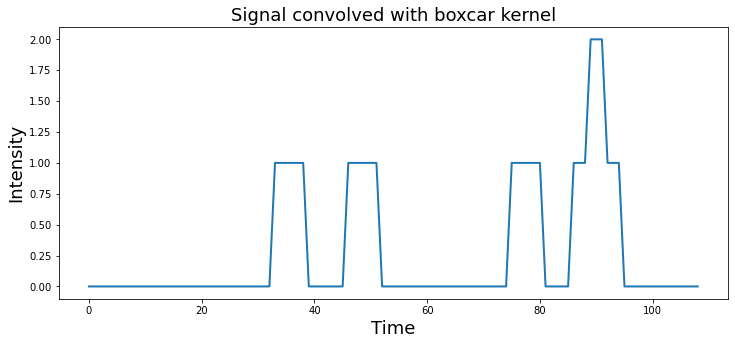

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(np.convolve(signal, kernel), linewidth=2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Signal convolved with boxcar kernel', fontsize=18)

Text(0.5, 0, 'Time')

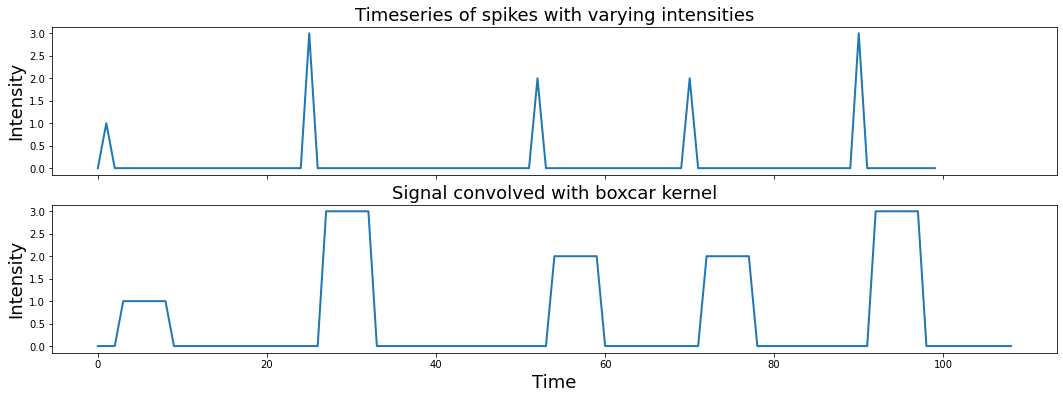

In [8]:
signal = np.zeros(n_samples)
signal[np.random.randint(0,n_samples,5)] = np.random.randint(1,5,5)

f,a = plt.subplots(nrows=2, figsize=(18,6), sharex=True)
a[0].plot(signal, linewidth=2)
a[0].set_ylabel('Intensity', fontsize=18)
a[0].set_title('Timeseries of spikes with varying intensities', fontsize=18)
a[1].plot(np.convolve(signal, kernel), linewidth=2)
#convolution
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_title('Signal convolved with boxcar kernel', fontsize=18)
a[1].set_xlabel('Time', fontsize=18)

Text(0.5, 1.0, 'Hemodynamic Response Function')

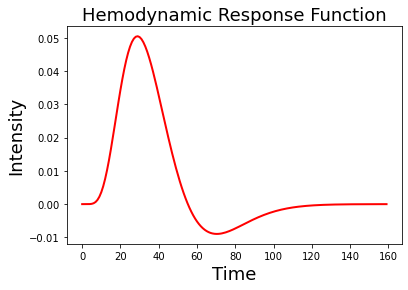

In [11]:
from nltools.external import glover_hrf
#a double gamma hemodynamic function (HRF) developed by Gary Glover. 血流动力学响应函数

tr = 2
hrf = glover_hrf(tr, oversampling=10)
plt.plot(hrf, linewidth=2, color='red')
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Hemodynamic Response Function', fontsize=18)

Text(0.5, 1.0, 'Hemodynamic Response Function')

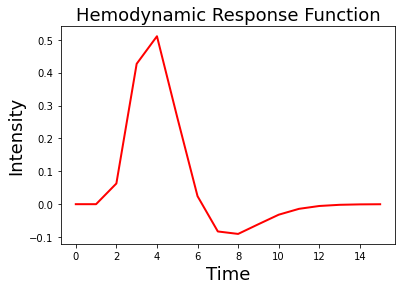

In [10]:
#In practice we will want to make sure that the kernel is the correct shape given our sampling resolution
hrf = glover_hrf(tr, oversampling=1)
plt.plot(hrf, linewidth=2, color='red')
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Hemodynamic Response Function', fontsize=18)

Text(0.5, 1.0, 'Signal convolved with HRF kernel')

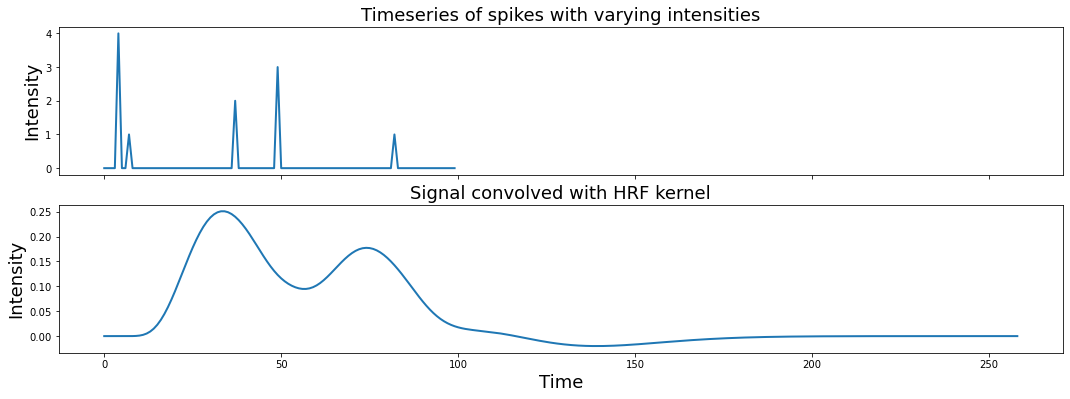

In [12]:
signal = np.zeros(n_samples)
signal[np.random.randint(0,n_samples,5)] = np.random.randint(1,5,5)

f,a = plt.subplots(nrows=2, figsize=(18,6), sharex=True)
a[0].plot(signal, linewidth=2)
a[1].plot(np.convolve(signal, hrf), linewidth=2)
a[0].set_ylabel('Intensity', fontsize=18)
a[0].set_title('Timeseries of spikes with varying intensities', fontsize=18)
a[1].set_ylabel('Intensity', fontsize=18)
a[1].set_xlabel('Time', fontsize=18)
a[1].set_title('Signal convolved with HRF kernel', fontsize=18)

# Oscillations

Text(0, 0.5, 'Amplitude')

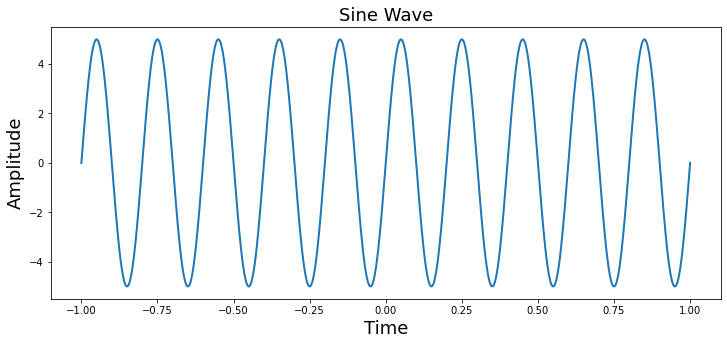

In [15]:
from numpy import sin, pi, arange

sampling_freq = 500
time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq)
amplitude = 5
freq = 5
theta = 0

simulation = amplitude * sin(2 * pi * freq * time + theta)

plt.figure(figsize=(12, 5))
plt.plot(time, simulation, linewidth=2)
plt.title('Sine Wave', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)

interactive(children=(FloatSlider(value=5.0, description='amplitude', max=10.0, step=0.5), FloatSlider(value=5…

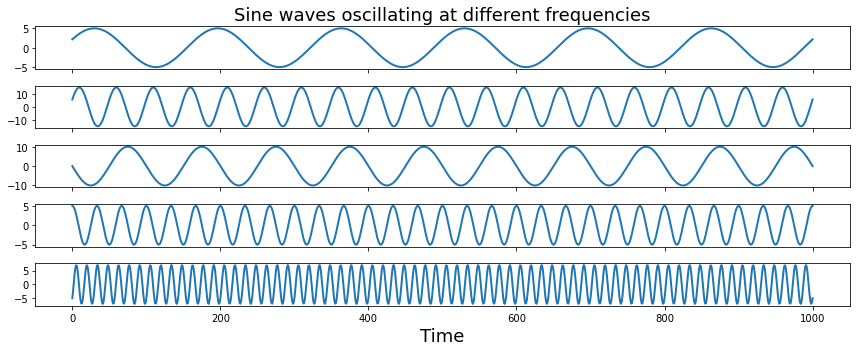

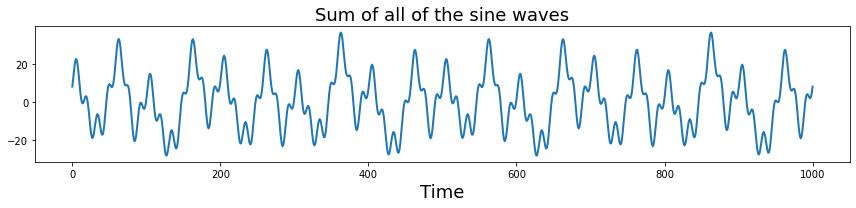

In [16]:
from ipywidgets import interact, FloatSlider
from numpy import sin, pi, arange, real, imag

def plot_oscillation(amplitude=5, frequency=5, theta=1):
    sampling_frequency=500
    time = arange(-1, 1 + 1/sampling_frequency, 1/sampling_frequency)
    simulation = amplitude * sin(2 * pi * frequency * time + theta)
    z = np.exp(1j*(2 * pi * frequency * time + theta))

    fig = plt.figure(figsize=(20, 4))
    gs = plt.GridSpec(1, 6, left=0.05, right=0.48, wspace=0.05)
    ax1 = fig.add_subplot(gs[0, :4])
    ax1.plot(time, simulation, linewidth=2)
    ax1.set_ylabel('Amplitude', fontsize=18)
    ax1.set_xlabel('Time', fontsize=18)
    ax2 = fig.add_subplot(gs[0, 5:], polar=True)
    ax2.plot(real(simulation), imag(simulation))
    plt.tight_layout()

interact(plot_oscillation, amplitude=FloatSlider(value=5, min=0, max=10, step=0.5),
         frequency=FloatSlider(value=5, min=0, max=10, step=0.5), 
         theta=FloatSlider(value=0, min=-5, max=5, step=0.5))
sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    
plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.xlabel('Time', fontsize=18)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()

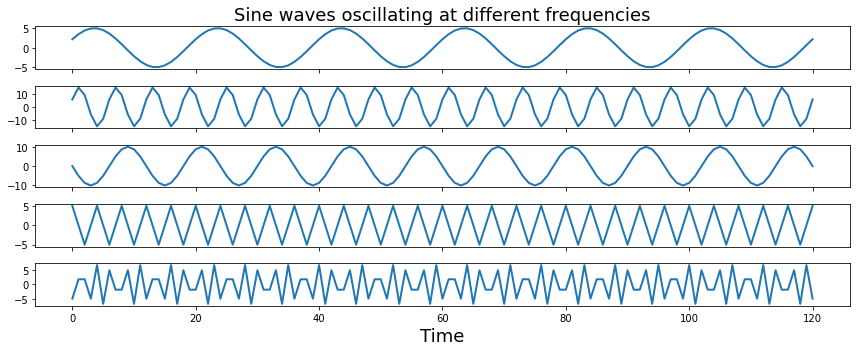

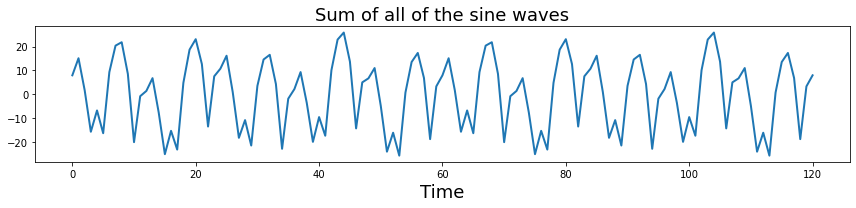

In [17]:
sampling_freq = 60

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


f,a = plt.subplots(nrows=5, ncols=1, figsize=(12,5), sharex=True)
for i,x in enumerate(freq):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title("Sine waves oscillating at different frequencies", fontsize=18)
a[i].set_xlabel("Time", fontsize=18)
plt.tight_layout()    


plt.figure(figsize=(12,3))
plt.plot(np.sum(sine_waves, axis=0), linewidth=2)
plt.title("Sum of all of the sine waves", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.tight_layout()    

Text(0.5, 0, 'Time')

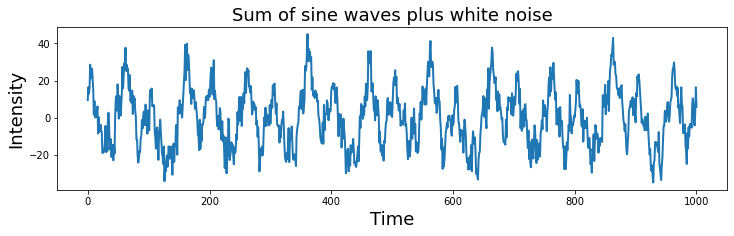

In [18]:
#add a little bit of gaussian (white) noise on top of this signal to make it even more realistic

sampling_freq = 500

freq = [3, 10, 5 ,15, 35]
amplitude = [5, 15, 10, 5, 7]
phases = pi*np.array([1/7, 1/8, 1, 1/2, -1/4])

time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 

sine_waves = []
for i,f in enumerate(freq):
    sine_waves.append(amplitude[i] * sin(2*pi*f*time + phases[i]))
sine_waves = np.array(sine_waves)


noise = 5 * np.random.randn(sine_waves.shape[1])
signal = np.sum(sine_waves,axis=0) + noise

plt.figure(figsize=(12,3))
plt.plot( signal, linewidth=2)
plt.title("Sum of sine waves plus white noise", fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)

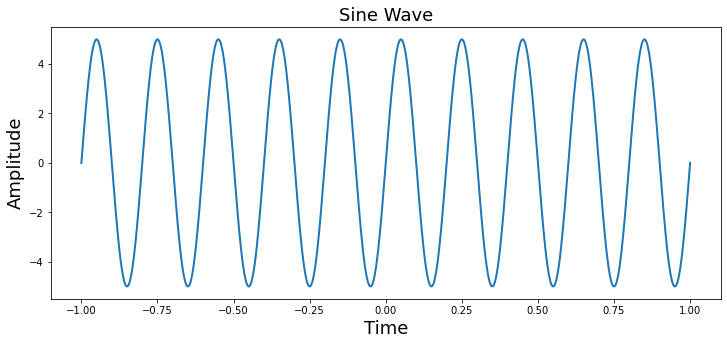

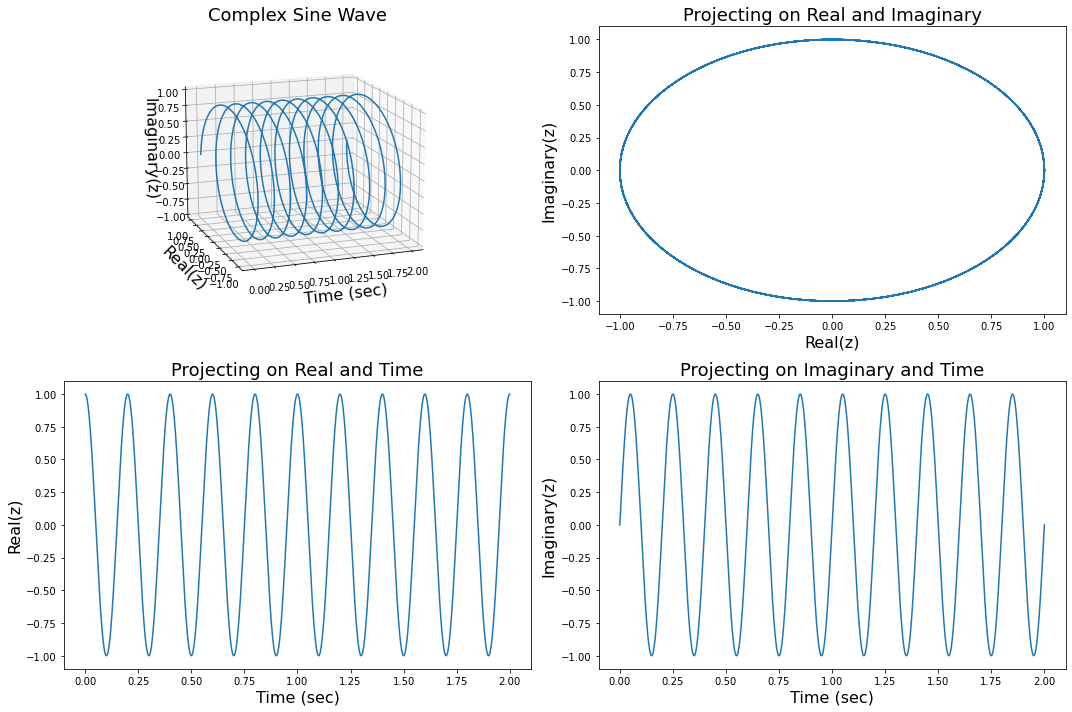

In [15]:
# a complex signal composed of multiple sine waves oscillating at different frequencies.
# the fourier transformations assume that your oscillatory signals are stationary
# create a bank of complex sine waves at different frequencies that are linearly spaced.


%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from numpy import sin, pi, arange, real, imag


sampling_freq = 500
time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq)
amplitude = 5
freq = 5
theta = 0

simulation = amplitude * sin(2 * pi * freq * time + theta)

plt.figure(figsize=(12, 5))
plt.plot(time, simulation, linewidth=2)
plt.title('Sine Wave', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
val = math.pi
time = arange(-1, 1 + 1/sampling_freq, 1/sampling_freq) 
frequency = 5
z =  np.exp(1j*(2 * val * frequency * time + theta))
#computing complex sine waves using the np.exp function

#extract the real components using np.real or the imaginary using np.imag.

fig= plt.figure(figsize=(15, 10))
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.plot(np.arange(0, len(time))/sampling_freq, real(z), imag(z))
ax.set_xlabel('Time (sec)', fontsize=16)
ax.set_ylabel('Real(z)', fontsize=16)
ax.set_zlabel('Imaginary(z)', fontsize=16)
ax.set_title('Complex Sine Wave', fontsize=18)
ax.view_init(15, 250)

ax = fig.add_subplot(2, 2, 2)
ax.plot(real(z), imag(z))
ax.set_xlabel('Real(z)', fontsize=16)
ax.set_ylabel('Imaginary(z)', fontsize=16)
ax.set_title('Projecting on Real and Imaginary', fontsize=18)

ax = fig.add_subplot(2, 2, 3)
ax.plot(np.arange(0, len(time))/sampling_freq, real(z))
ax.set_xlabel('Time (sec)', fontsize=16)
ax.set_ylabel('Real(z)', fontsize=16)
ax.set_title('Projecting on Real and Time', fontsize=18)

ax = fig.add_subplot(2, 2, 4,)
ax.plot(np.arange(0, len(time))/sampling_freq, imag(z))
ax.set_xlabel('Time (sec)', fontsize=16)
ax.set_ylabel('Imaginary(z)', fontsize=16)
ax.set_title('Projecting on Imaginary and Time', fontsize=18)
plt.tight_layout()

C:\Users\ZY\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ZY\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ZY\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ZY\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ZY\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Power spectrum derived from discrete fourier transform')

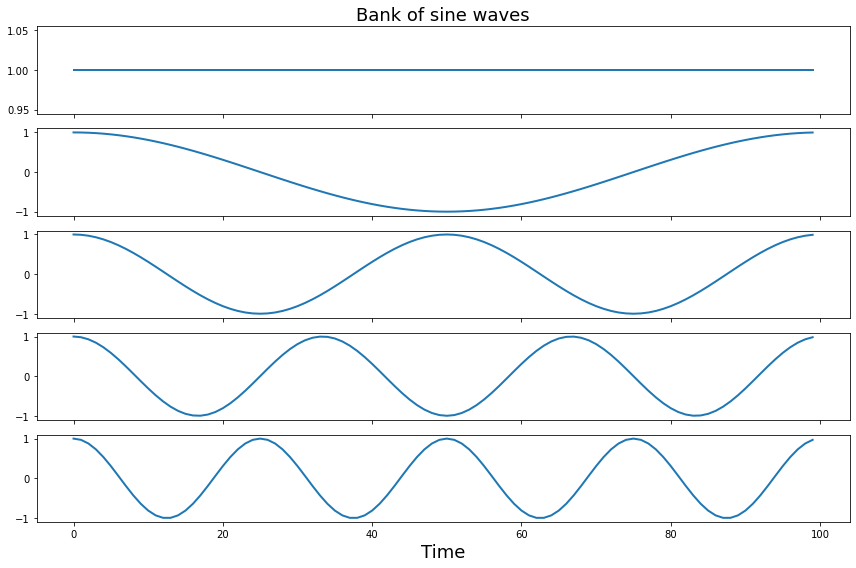

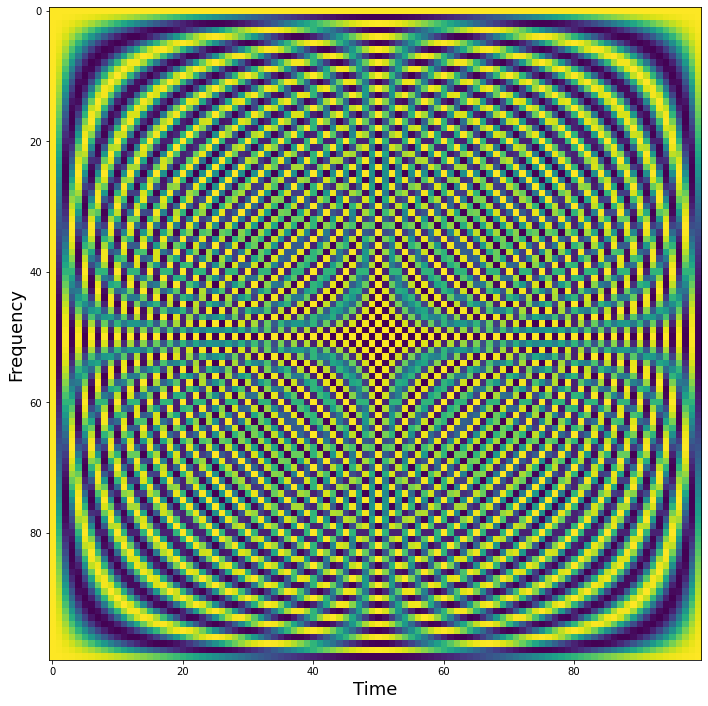

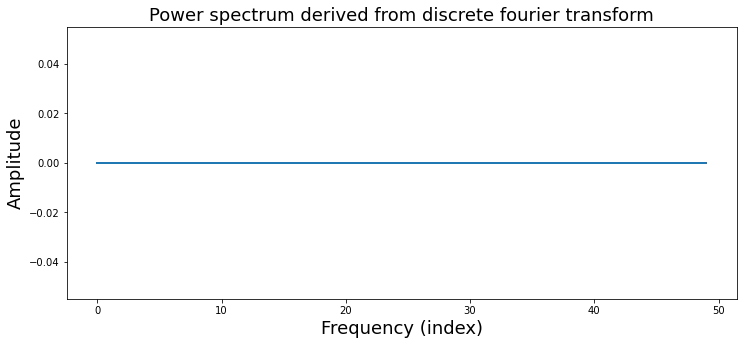

In [21]:
import numpy as np
from numpy import exp
from numpy import sin, pi, arange, real, imag
n_samples = 100
signal = np.zeros(n_samples)
time = np.arange(0, len(signal), 1)/len(signal)
sine_waves = []
for i in range(len(signal)):
    sine_waves.append(exp(-1j*2*pi*i*time))
sine_waves = np.array(sine_waves)

f,a = plt.subplots(nrows=5, figsize=(12,8), sharex=True)
for i in range(0,5):
    a[i].plot(sine_waves[i,:], linewidth=2)
a[0].set_title('Bank of sine waves', fontsize=18)
a[i].set_xlabel('Time', fontsize=18)
plt.tight_layout()
plt.figure(figsize = (12, 12))
plt.imshow(np.real(sine_waves))
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Time', fontsize=18)
fourier = 2*np.dot(signal, sine_waves)/len(signal)
plt.figure(figsize=(12, 5))
plt.plot(np.abs(fourier[0:int(np.ceil(len(fourier)/2))]), linewidth=2)
plt.xlabel('Frequency (index)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Power spectrum derived from discrete fourier transform', fontsize=18)

#the first basis function is zero frequency component and reflects the mean offset over the entire signal.
#visualization: Each row is a different sine wave, and columns reflect time
#he second half of the sine waves appear to be a mirror image of the first half. 
#This is because the first half contain the positive frequencies, while the second half contains the negative frequencies
#Negative frequencies capture sine waves that travel in reverse order around the complex plane compared to that travel forward.

Text(0.5, 1.0, 'Power spectrum derived from discrete fourier transform')

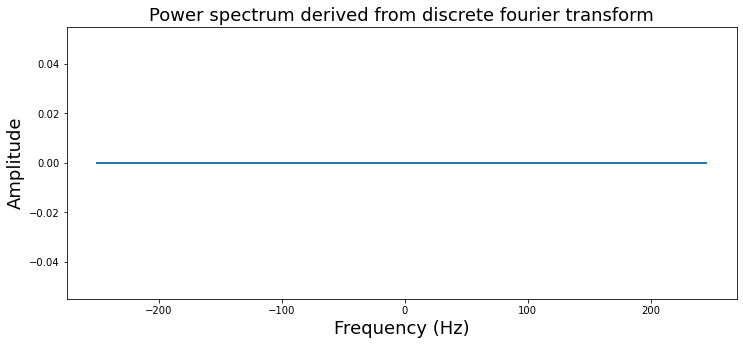

In [23]:
from numpy.fft import fftfreq

freq = fftfreq(len(signal),1/sampling_freq)

plt.figure(figsize=(12,5))
plt.plot(freq[:80], np.abs(fourier)[0:80], linewidth=2)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude', fontsize=18)
plt.title('Power spectrum derived from discrete fourier transform', fontsize=18)

C:\Users\ZY\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Reconstructed Time Series Signal')

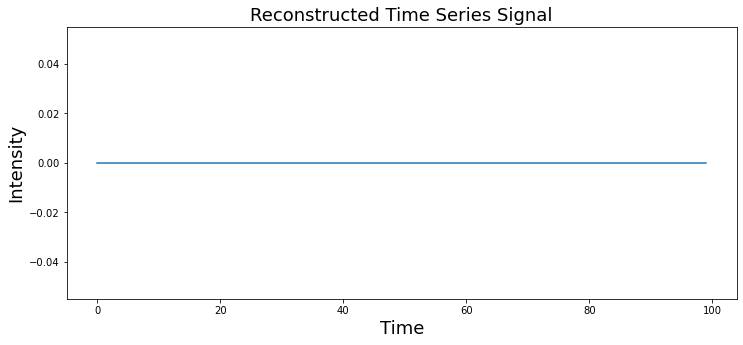

In [22]:
plt.figure(figsize=(12,5))
plt.plot(np.dot(fourier, sine_waves)/2)
plt.ylabel('Intensity', fontsize=18)
plt.xlabel('Time', fontsize=18)
plt.title('Reconstructed Time Series Signal', fontsize=18)